<b>Название проекта</b>   
Самостоятельный проект. Обучение с учителем: качество модели

<b>Описание задачи</b>  
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудиптории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
<b>Описание исследования</b>


<b>задачи исследования</b>  
Построение модели, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.  
В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.  
Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.  

<b>Описание данных</b>

Описание данных
Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.
market_file.csv  
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.  
id — номер покупателя в корпоративной базе данных.  
Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».  
Тип сервиса — уровень сервиса, например «премиум» и «стандарт».  
Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.  
Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.  
Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.  
Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.  
Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.  
Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.  
Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.  
Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца. 
market_money.csv  
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.  
id — номер покупателя в корпоративной базе данных.  
Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.  
Выручка — сумма выручки за период.  
market_time.csv  
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
id — номер покупателя в корпоративной базе данных.  
Период — название периода, во время которого зафиксировано общее время.  
минут — значение времени, проведённого на сайте, в минутах.  
money.csv  
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  
id — номер покупателя в корпоративной базе данных.  
Прибыль — значение прибыли.  



<b>Этапы исследования</b>  
Шаг 1. Загрузка данных  

Шаг 2. Предобработка данных

Шаг 3. Исследовательский анализ данных

Шаг 4. Объединение таблиц

Шаг 5. Корреляционный анализ  

Шаг 6. Использование пайплайнов  

Шаг 7. Анализ важности признаков  

Шаг 8. Сегментация покупателей  

Шаг 9. Общий вывод 


## Импорт
### Импорт рабочих инструментов (разбить по группам и подписать)




In [1]:
#Базовые биилиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random

!pip install scikit-learn --upgrade -q
!pip install shap -q
import shap

# Модели 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler,RobustScaler,MinMaxScaler, PolynomialFeatures

#Метрики
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVC
from sklearn.datasets import make_classification


#Пайплайны
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 

from shap import Explainer
from shap.plots import beeswarm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

### Импорт Данных 

In [2]:
market_file= pd.read_csv('/datasets/market_file.csv')



display(market_file.head(10))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


In [3]:
market_time= pd.read_csv('/datasets/market_time.csv')
display(market_time.head(10))
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [4]:
market_money= pd.read_csv('/datasets/market_money.csv')
display(market_money.head(10))
market_money.info()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [5]:
money= pd.read_csv('/datasets/money.csv')
display(money.head(10))


,id;Прибыль
215348;0,98.0
215349;4,16.0
215350;3,13.0
215351;4,87.0
215352;4,21.0
215353;3,95.0
215354;3,62.0
215355;5,26.0
215356;4,93.0
215357;4,66.0


In [6]:
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',') 
display(money.head(10))
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21
5,215353,3.95
6,215354,3.62
7,215355,5.26
8,215356,4.93
9,215357,4.66


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Вывод:  
Данные были импортированы в полном объеме.  
Предварительно проверены размерность и типы данных.  
дальнейшая их обработка далее.

## Предобработка

In [7]:
display('Количество людей в 1 таблице',len(market_file['id'].unique()))
display('Количество людей в 2 таблице',len(market_time['id'].unique()))
display('Количество людей в 3 таблице',len(market_money['id'].unique()))
display('Количество людей в 4 таблице',len(money['id'].unique()))
#Проверка размерности

'Количество людей в 1 таблице'

1300

'Количество людей в 2 таблице'

1300

'Количество людей в 3 таблице'

1300

'Количество людей в 4 таблице'

1300

In [8]:
display(market_file.duplicated().sum())
display(market_time.duplicated().sum())
display(market_money.duplicated().sum())
display(money.duplicated().sum())

0

0

0

0

In [9]:
market_file=market_file.dropna()
market_time=market_time.dropna()
market_money=market_money.dropna()
money=money.dropna()

Вывод:  
Проведена проверка на кол-во пользователей в каждой отдельной таблице.  
Проведена проверка на явные дубликаты в коде  

### Предобработка таблицы market_file

In [10]:
#market_file.columns
display(market_file.head())
market_file=market_file.sort_values(by='id')
market_file.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [11]:
display(market_file['Тип сервиса'].unique())
display(market_file['Маркет_актив_тек_мес'].unique())
display(market_file['Маркет_актив_6_мес'].unique())
#display(market_file[''].unique())

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array([5, 4, 3])

array([3.4, 4.4, 4.9, 3.2, 5.1, 3.3, 4.7, 4.2, 3.9, 4.6, 4.3, 3.8, 2.7,
       4.8, 2.9, 3. , 2.4, 1.7, 3.6, 4. , 1.5, 3.5, 4.1, 3.1, 1.4, 0.9,
       5.6, 2.6, 5.5, 5.2, 5.8, 5. , 5.4, 5.7, 5.3, 3.7, 6.3, 6.6, 4.5,
       6.1, 5.9])

In [12]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].str.replace('стандартт','стандарт')
display(market_file['Тип сервиса'].unique())

array(['премиум', 'стандарт'], dtype=object)

Исправлена текстовая часть  
Проверены типы данных  

### Предобработка таблицы market_money

In [13]:
display(market_money.head())
market_money=market_money.sort_values(by='id')
market_money.info()
display(market_money['id'].duplicated().sum())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.9+ KB


2600

In [14]:
display(market_money['Период'].unique())

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [15]:
market_money_tot= market_money.pivot_table(index=['id'],
                         #columns = 'id',
                         values='Выручка',
                         aggfunc='sum')

#data1 = data1.rename(columns={'sum':'Выручка_Пользователя'})
display(market_money_tot.head(5))

,Выручка
id,
215348,3293.1
215349,14659.6
215350,15341.9
215351,17561.4
215352,16274.0


In [16]:
market_money_tot= market_money_tot.query("`Выручка` >=  0") 
#Убираем клиентов без покупок за 3 месяца
market_money_tot.info()
display(market_money_tot.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Выручка  1300 non-null   float64
dtypes: float64(1)
memory usage: 20.3 KB


,Выручка
id,
215348,3293.1
215349,14659.6
215350,15341.9
215351,17561.4
215352,16274.0


In [17]:
market_money['id'].drop_duplicates(inplace=True)
market_money.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.9+ KB


Создан показатель общего проведенного времени в маректплейсе
  
Проверены типы данных  

### Предобработка таблицы market_time

In [18]:
display(market_time.head())
market_time.info()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.2+ KB


In [19]:
display(market_time['Период'].unique())

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [20]:
market_time['Период'] = market_time['Период'].str.replace('предыдцщий_месяц','предыдущий_месяц')

In [21]:
market_time_tot= market_time.pivot_table(index=['id'],
                         #columns = 'platform',
                         values='минут',
                         aggfunc='sum')
market_time_tot= market_time_tot.query("`минут` >=  0") 
market_time_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 215348 to 216647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   минут   1300 non-null   int64
dtypes: int64(1)
memory usage: 20.3 KB


Исправлена текстовая часть  
Проверены типы данных 
Введен показатель общего времени  
В дальнейшем введем разбивку по месяцам

### Предобработка таблицы money

In [22]:
display(money.head())
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 30.5 KB


### Вывод по предобработке



Проверил размерность  
Проверил типы данных  
Ввел доп. показатели  
Подготовил данные для анализа данных 

## Исследовательский  анализ данных

Вводим функции

In [24]:
def analysis_BAR(adata_in, chapter, heading, Х, Y, bins):
    print(adata_in[chapter].describe())
    adata_ini = adata_in[chapter].value_counts(ascending=True)
    display(adata_ini)
    adata_ini.plot.bar(figsize=(5, 3), ec='black')
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    plt.legend(loc=2)
    plt.figure(figsize=(40,20))
    plt.show()

In [25]:
def analysis_GRAF(adata_in, chapter, heading, Х, Y, bins):
    print(adata_in[chapter].describe())
    adata_ini = adata_in.groupby(chapter).mean()
    display(adata_ini.head(5))
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    plt.figure(figsize=(40,20))
    plt.plot(adata_ini.index)
    adata_ini.boxplot(column=chapter, figsize=(10, 8))

In [26]:
def analysis_BOX(adata_in, chapter, heading, Х, Y, bins):
    print(adata_in[chapter].describe())
    adata_ini = adata_in.groupby(chapter).mean()
    display(adata_ini.head(5))
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    plt.figure(figsize=(40,20))
    #plt.plot(adata_ini.index)
    adata_ini.boxplot(column=chapter, figsize=(10, 8))

In [27]:
def analysis_HIST(adata_in, chapter, heading, Х, Y, bins):
    print(adata_in[chapter].describe())
    #adata_ini = adata_in.groupby(chapter).mean()
    #display(adata_in[chapter].head(5))
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    #plt.figure(figsize=(40,20))
    plt.hist(x=adata_in[chapter], bins=bins, density=True)
    

### Исследовательский  анализ таблицы market_file

count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: Покупательская активность, dtype: object


Снизилась          498
Прежний уровень    802
Name: Покупательская активность, dtype: int64

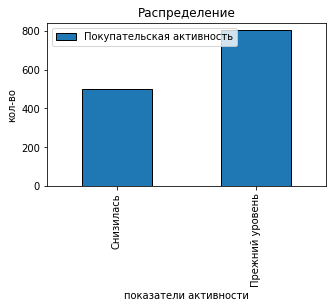

<Figure size 2880x1440 with 0 Axes>

In [28]:
analysis_BAR(market_file,
             'Покупательская активность',
             'Распределение',
             'показатели активности',
             'кол-во',
             40)

Распределение данных неравное, количество клиентов сохранивших активность больше чем потерявших почти на 60%  
Однако даже такая доля снижения активности высока

count         1300
unique           2
top       стандарт
freq           924
Name: Тип сервиса, dtype: object


премиум     376
стандарт    924
Name: Тип сервиса, dtype: int64

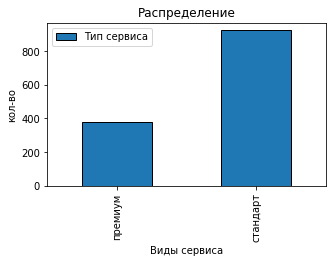

<Figure size 2880x1440 with 0 Axes>

In [29]:
analysis_BAR(market_file,
             'Тип сервиса',
             'Распределение',
             'Виды сервиса',
             'кол-во',
             40)

Распределение данных неравное, количество клиентов со стандартной подпиской почти в 2.5 раза больше чем премьер.

count     1300
unique       2
top         да
freq       962
Name: Разрешить сообщать, dtype: object


нет    338
да     962
Name: Разрешить сообщать, dtype: int64

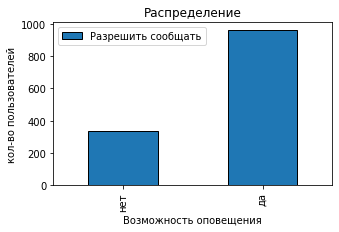

<Figure size 2880x1440 with 0 Axes>

In [30]:
analysis_BAR(market_file,
             'Разрешить сообщать',
             'Распределение',
             'Возможность оповещения',
             'кол-во пользователей',
             40)

Распределение данных неравное, Большая часть клиентов оставляет оповещения от приложения, возможно это связано с их малой частотой либо сложностями в отключении.

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64


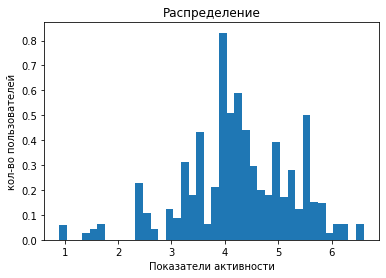

In [31]:
analysis_HIST(market_file,
             'Маркет_актив_6_мес',
             'Распределение',
             'Показатели активности',
             'кол-во пользователей',
             40)

По распределнию видно что основная масса пользователей приносит выгоду в размере от 3 до 6 процентов, однако присутсвует некоторое количество тех, кто покупает более выгодные для маркетплейсов товары.  
Наибольшее количество клиентов приносит 4%.

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64


3    308
5    323
4    669
Name: Маркет_актив_тек_мес, dtype: int64

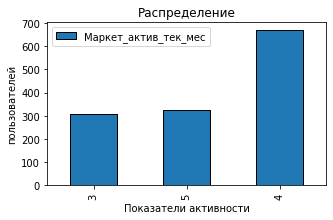

<Figure size 2880x1440 with 0 Axes>

In [32]:
analysis_BAR(market_file,
             'Маркет_актив_тек_мес',
             'Распределение',
             'Показатели активности',
             'пользователей',
             30)

Распределение такого: почти половина клиентов имеет среднее значение взаимодействий с марктеплейсом (4), а количество тех кто обращается меньше и больше раз равно.

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64


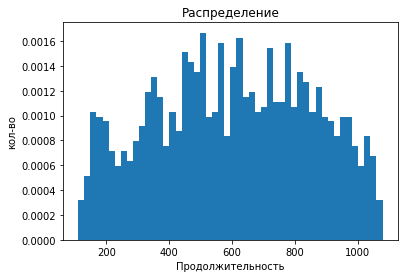

In [33]:
analysis_HIST(market_file,
             'Длительность',
             'Распределение',
             'Продолжительность',
             'кол-во',
             50)

Можно заметить что количество привлекаемых пользователей плавно падает по мере существования магазина, возможно это связано с уменьшением количества не пользующихся им людей.  
Также присутсвуют пиковые значения привлечения людей, возможно это связано с какими либо рекламными акциями проводимыми в прошлом.  

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64


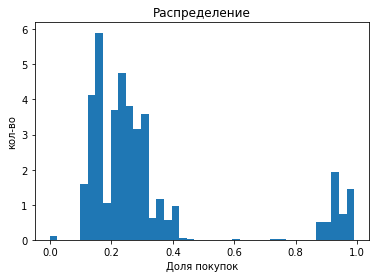

In [34]:
analysis_HIST(market_file,
             'Акционные_покупки',
             'Распределение',
             'Доля покупок',
             'кол-во',
             40)

Как видно по графику клиенты делятся на 2 группы

Первая покупает только во время акций, из за чего показатель стремится к 1  
Вторая производит покупки постоянно, не подстраивая график под акции  

<AxesSubplot:>

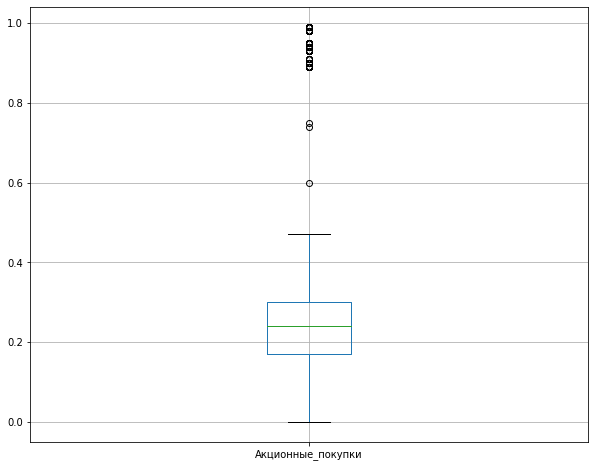

In [35]:
market_file.boxplot(column='Акционные_покупки', figsize=(10, 8))

count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: Популярная_категория, dtype: object


Кухонная посуда                         138
Мелкая бытовая техника и электроника    174
Техника для красоты и здоровья          184
Косметика и аксесуары                   223
Домашний текстиль                       251
Товары для детей                        330
Name: Популярная_категория, dtype: int64

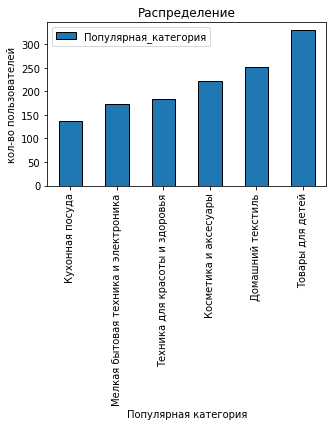

<Figure size 2880x1440 with 0 Axes>

In [36]:
analysis_BAR(market_file,
             'Популярная_категория',
             'Распределение',
             'Популярная категория',
             'кол-во пользователей',
             40)

Наибольшую популрность имею товары детей  
Меньше всего покупают Кухонную посуда  
категории распределены относиельно равномерно без резких выбросов

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64


6     86
1    106
5    177
4    263
2    312
3    356
Name: Средний_просмотр_категорий_за_визит, dtype: int64

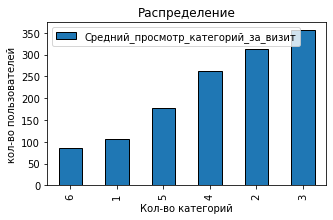

<Figure size 2880x1440 with 0 Axes>

In [37]:
analysis_BAR(market_file,
             'Средний_просмотр_категорий_за_визит',
             'Распределение',
             'Кол-во категорий',
             'кол-во пользователей',
             40)

В среднем клиент просматривает от 2 до 5 категорий за визит.  

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64


10      4
9      10
8      20
7      34
6      44
0     116
5     135
4     197
3     218
1     261
2     261
Name: Неоплаченные_продукты_штук_квартал, dtype: int64

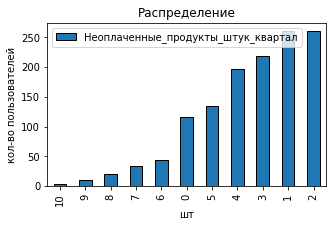

<Figure size 2880x1440 with 0 Axes>

In [38]:
analysis_BAR(market_file,
             'Неоплаченные_продукты_штук_квартал',
             'Распределение',
             'шт',
             'кол-во пользователей',
             40)

Большая часть клиентов имеет малое количество неоплаченных покупок, скорее всего причиной для них является отмена товаров в следствии неправильно выбранного в корзину варианта.

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64


9     15
0     17
8     66
1     74
7     92
6    156
2    189
5    208
3    226
4    257
Name: Ошибка_сервиса, dtype: int64

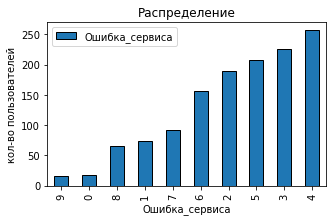

<Figure size 2880x1440 with 0 Axes>

In [39]:
analysis_BAR(market_file,
             'Ошибка_сервиса',
             'Распределение',
             'Ошибка_сервиса',
             'кол-во пользователей',
             40)

В среднем клиент получает от 2 до 6 ошибок в месяц, возможно следует потратить время на оптимизацию системы.  

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64


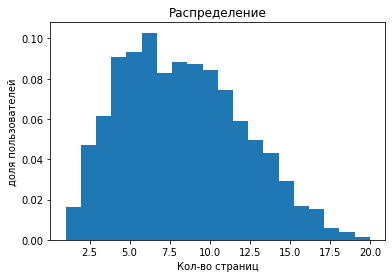

In [40]:
analysis_HIST(market_file,
             'Страниц_за_визит',
             'Распределение',
             'Кол-во страниц',
             'доля пользователей',
             20)

### Исследовательский  анализ таблицы market_money

count      1300.000000
mean      15077.088154
std        3301.835476
min        3293.100000
25%       13942.950000
50%       15071.500000
75%       16087.025000
max      117990.200000
Name: Выручка, dtype: float64


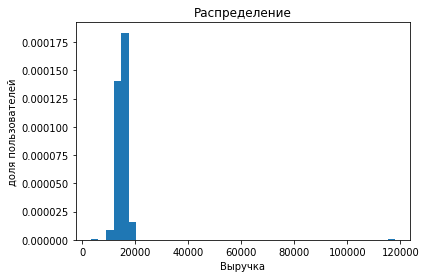

In [41]:
analysis_HIST(market_money_tot,
             'Выручка',
             'Распределение',
             'Выручка',
             'доля пользователей',
             40)

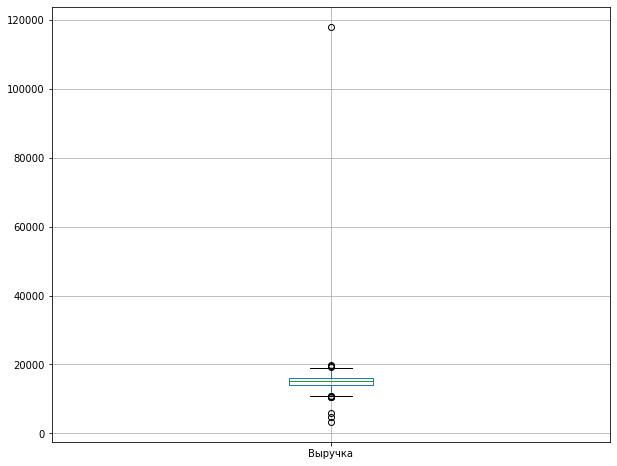

In [42]:
market_money_tot.boxplot(column='Выручка', figsize=(10, 8))
market_money_tot['Выручка']= market_money_tot['Выручка'][market_money_tot['Выручка']< 30000]

<AxesSubplot:>

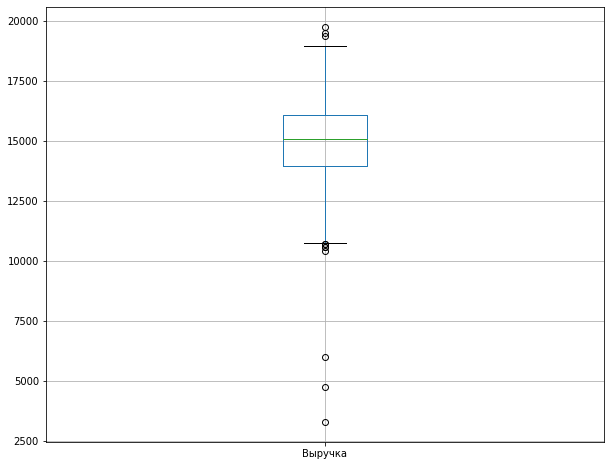

In [43]:
market_money_tot.boxplot(column='Выручка', figsize=(10, 8))

In [44]:
market_money_tot['Выручка'][market_money_tot['Выручка']< 7000].count()

3

count     1299.000000
mean     14997.863279
std       1656.706215
min       3293.100000
25%      13942.300000
50%      15071.100000
75%      16085.550000
max      19766.500000
Name: Выручка, dtype: float64


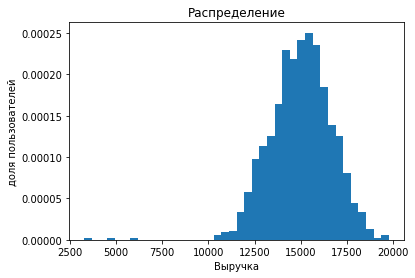

In [45]:
analysis_HIST(market_money_tot,
             'Выручка',
             'Распределение',
             'Выручка',
             'доля пользователей',
             40)

Вывод: 

В среднем общая выручка от клиента за 3 месяца находится в промежутке от 12500 до 17500.  
Присутвуют значения как сильно меньше, так и больше, но они скорее всего связаны с заинтересованностью отдельных клиентов в маркетплейсе.

### Исследовательский  анализ таблицы market_time

count    1300.000000
mean       26.672308
std         6.698753
min         9.000000
25%        21.000000
50%        27.000000
75%        32.000000
max        45.000000
Name: минут, dtype: float64


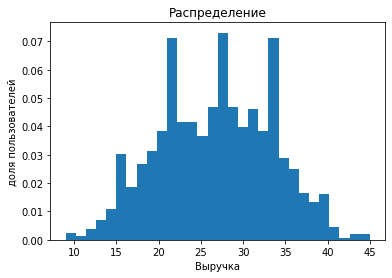

In [46]:
analysis_HIST(market_time_tot,
             'минут',
             'Распределение',
             'Выручка',
             'доля пользователей',
             30)

Вывод: Средняий показатель проведенного времени у пользоватей 20-35 минут. Скорее всего этого времени хватает на просмотр свежих предложений либо поиск нужного товара и его сравнения с аналогами


### Исследовательский  анализ таблицы money

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


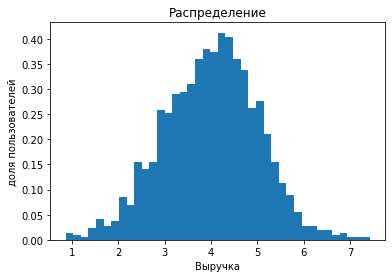

In [48]:
analysis_HIST(money,
             'Прибыль',
             'Распределение',
             'Выручка',
             'доля пользователей',
             40)

<AxesSubplot:>

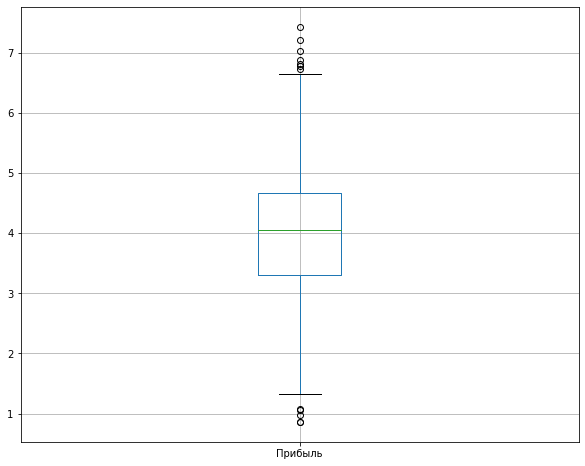

In [49]:
money.boxplot(column='Прибыль', figsize=(10, 8))

Средний показатель выручки у пользоватей 3-5.5 процентов.  
Видимо этот показатель наиболее характерен для представленных товаров, с учетом периодичческих акций, сокращающих этот процесс в случае отдельной покупки.

### Вывод по исследовательскому анализу




Результаты анализа: 
Целевой признак распределен неравномерно, большая часть пользователей сохранила свой уровень активности  
Количество клиентов со стандартной подпиской почти в 2.5 раза больше чем премьер.  
Большая часть клиентов оставляет оповещения от приложения, возможно это связано с их малой частотой либо сложностями в отключении.  
Основная масса пользователей приносит выгоду в размере от 3 до 6 процентов, однако присутствует некоторое количество тех, кто покупает более выгодные для маркетплейсов товары.  
Наибольшее количество клиентов приносит 4%.   
Почти половина клиентов имеет среднее значение взаимодействий с марктеплейсом (4), а количество тех кто обращается меньше и больше раз равно.  
Можно заметить что количество привлекаемых пользователей плавно падает по мере существования магазина, возможно это связано с уменьшением количества не пользующихся им людей.  

Клиенты делятся на 2 группы  
Первая покупает только во время акций, из за чего показатель стремится к 1  
Вторая производит покупки постоянно, не подстраивая график под акции  
Наибольшую популрность имею товары детей  
Меньше всего покупают Кухонную посуду  
В среднем клиент просматривает от 2 до 5 категорий за визит.   
Большая часть клиентов имеет малое количество неоплаченных покупок.     
В среднем клиент получает от 2 до 6 ошибок в месяц  

Средняий показатель проведенного времени у пользоватей 20-35 минут. Скорее всего этого времени хватает на просмотр свежих предложений либо поиск нужного товара и его сравнения с аналогами.

В среднем общая выручка от клиента за 3 месяца находится в промежутке от 12500 до 17500.
Присутвуют значения как сильно меньше, так и больше, но они скорее всего связаны с заинтересованностью отдельных клиентов в маркетплейсе.

Средний показатель выручки у пользоватей 3-5.5 процентов.
Видимо этот показатель наиболее характерен для представленных товаров, с учетом периодических акций, сокращающих этот процесс в случае отдельной покупки

## Объединение таблиц

In [50]:
data=market_file
market_money_tot=market_money_tot.reset_index()
market_time_tot=market_time_tot.reset_index()
#market_money_tot['Выручка']= market_money_tot['Выручка'][market_money_tot['Выручка']< 30000]

In [51]:
data['Выручка_общая']= market_money_tot['Выручка']

In [52]:
market_money1=market_money[market_money['Период']== 'препредыдущий_месяц'].reset_index()
data['Выручка_пред2_мес']=market_money1['Выручка']

In [53]:
market_money1=market_money[market_money['Период']== 'предыдущий_месяц'].reset_index()
data['Выручка_пред_мес']= market_money1['Выручка']

In [54]:
market_money1=market_money[market_money['Период']== 'текущий_месяц'].reset_index()
data['Выручка_тек_мес']= market_money1['Выручка']

In [55]:
data['Общее_время_мин']= market_time_tot['минут']

In [56]:
market_time1=market_time[market_time['Период']== 'текущий_месяц'].reset_index()
data['время/мес_тек_мес']= market_time1['минут']

In [57]:
market_time1=market_time[market_time['Период']== 'предыдущий_месяц'].reset_index()
data['время/мес_пред_мес']= market_time1['минут']

In [58]:
display(data.head(5))
data.info()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_общая,Выручка_пред2_мес,Выручка_пред_мес,Выручка_тек_мес,Общее_время_мин,время/мес_тек_мес,время/мес_пред_мес
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,3293.1,0.0,0.0,3293.1,27,14,13
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,14659.6,4472.0,5216.0,4971.6,22,10,12
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,15341.9,4826.0,5457.5,5058.4,21,13,8
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,17561.4,4793.0,6158.0,6610.4,24,13,11
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,16274.0,4594.0,5807.5,5872.5,19,11,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Вывод: 

Получен основной датасет, в него включены данные о выручке, прибыли и проведенном времени.

## Корреляционный анализ

In [59]:
def beta_encode(data1, chapter, first, second):
    data1[chapter]= data1[chapter].str.replace(first,'0')
    data1[chapter]= data1[chapter].str.replace(second,'1')
    data1[chapter] = data1[chapter].astype('float64')

In [60]:
data_corr=data

In [61]:
beta_encode(data_corr, 'Тип сервиса', 'стандарт', 'премиум')
beta_encode(data_corr, 'Разрешить сообщать', 'нет', 'да')
beta_encode(data_corr, 'Покупательская активность', 'Снизилась', 'Прежний уровень') 
# Вводим в матрицу категориальные признаки, в том числе целевой и важный для анализа

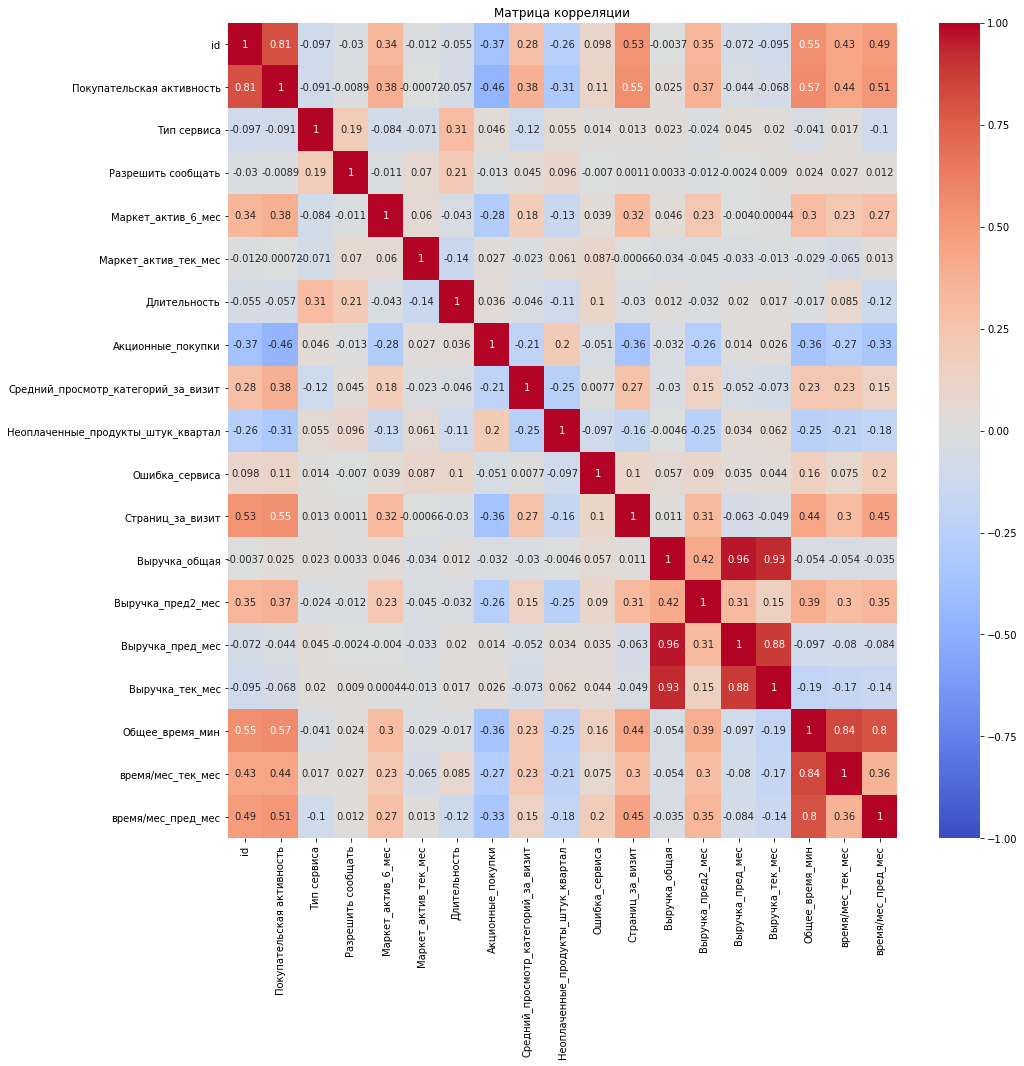

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_общая,Выручка_пред2_мес,Выручка_пред_мес,Выручка_тек_мес,Общее_время_мин,время/мес_тек_мес,время/мес_пред_мес
Покупательская активность,0.812465,1.000000,-0.090608,-0.008946,0.383113,-0.000720,-0.056817,-0.463014,0.379782,-0.310809,0.113015,0.549724,0.025346,0.371462,-0.044131,-0.068214,0.569722,0.438806,0.514918
id,1.000000,0.812465,-0.096899,-0.030380,0.341318,-0.011864,-0.054837,-0.370367,0.276296,-0.255334,0.098380,0.529783,-0.003708,0.345593,-0.071728,-0.094902,0.550166,0.433676,0.486086
Общее_время_мин,0.550166,0.569722,-0.041087,0.024278,0.302197,-0.028669,-0.016533,-0.359245,0.232476,-0.249093,0.163988,0.439211,-0.054222,0.393104,-0.096553,-0.190076,1.000000,0.837676,0.800825
Страниц_за_визит,0.529783,0.549724,0.013264,0.001104,0.319911,-0.000658,-0.029883,-0.364669,0.265051,-0.164541,0.104176,1.000000,0.010599,0.314538,-0.063056,-0.048549,0.439211,0.299162,0.450891
время/мес_пред_мес,0.486086,0.514918,-0.100034,0.012292,0.274135,0.012835,-0.122798,-0.330843,0.148098,-0.183408,0.195170,0.450891,-0.035115,0.347982,-0.083537,-0.143600,0.800825,0.360526,1.000000
время/мес_тек_мес,0.433676,0.438806,0.016883,0.026828,0.226258,-0.064918,0.084989,-0.270957,0.233094,-0.214728,0.075257,0.299162,-0.053743,0.301096,-0.079892,-0.165191,0.837676,1.000000,0.360526
Маркет_актив_6_мес,0.341318,0.383113,-0.083906,-0.010730,1.000000,0.060034,-0.042737,-0.275042,0.183511,-0.134096,0.039080,0.319911,0.045915,0.234034,-0.003983,0.000442,0.302197,0.226258,0.274135
Средний_просмотр_категорий_за_визит,0.276296,0.379782,-0.116706,0.045232,0.183511,-0.022552,-0.046013,-0.205344,1.000000,-0.251621,0.007724,0.265051,-0.030320,0.145903,-0.052337,-0.073350,0.232476,0.233094,0.148098
Выручка_пред2_мес,0.345593,0.371462,-0.024245,-0.011615,0.234034,-0.044874,-0.032213,-0.259024,0.145903,-0.247772,0.089505,0.314538,0.417348,1.000000,0.313482,0.151969,0.393104,0.301096,0.347982
Ошибка_сервиса,0.098380,0.113015,0.013720,-0.006988,0.039080,0.087050,0.102935,-0.051411,0.007724,-0.097442,1.000000,0.104176,0.056913,0.089505,0.035085,0.043836,0.163988,0.075257,0.195170


In [62]:

corr_matrix = data_corr.corr(method='spearman')
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix.sort_values(by='Покупательская активность', ascending=False))

Наибольшее влияние на покупательскую активность оказывают такие показатели как:
1. Время проведенное на сайте (как бщее так и в отдельные месяцы)
2. Страниц_за_визит
3. Маркет_актив_6_мес (активность за послдние месяцы)
4. Средний_просмотр_категорий_за_визит 
5. Выручка_пред2_мес (выручка за препредыдущий месяц) (возможно это связано с тем что при выгодной деятельности работа на сайте продолжается, а при ошибке пользователь уходит, либо с каким либо мероприятием, проходившим за месяц до момента сбора данных)


In [63]:
data_corr['Покупательская активность'] =data_corr['Покупательская активность'].astype('int64')



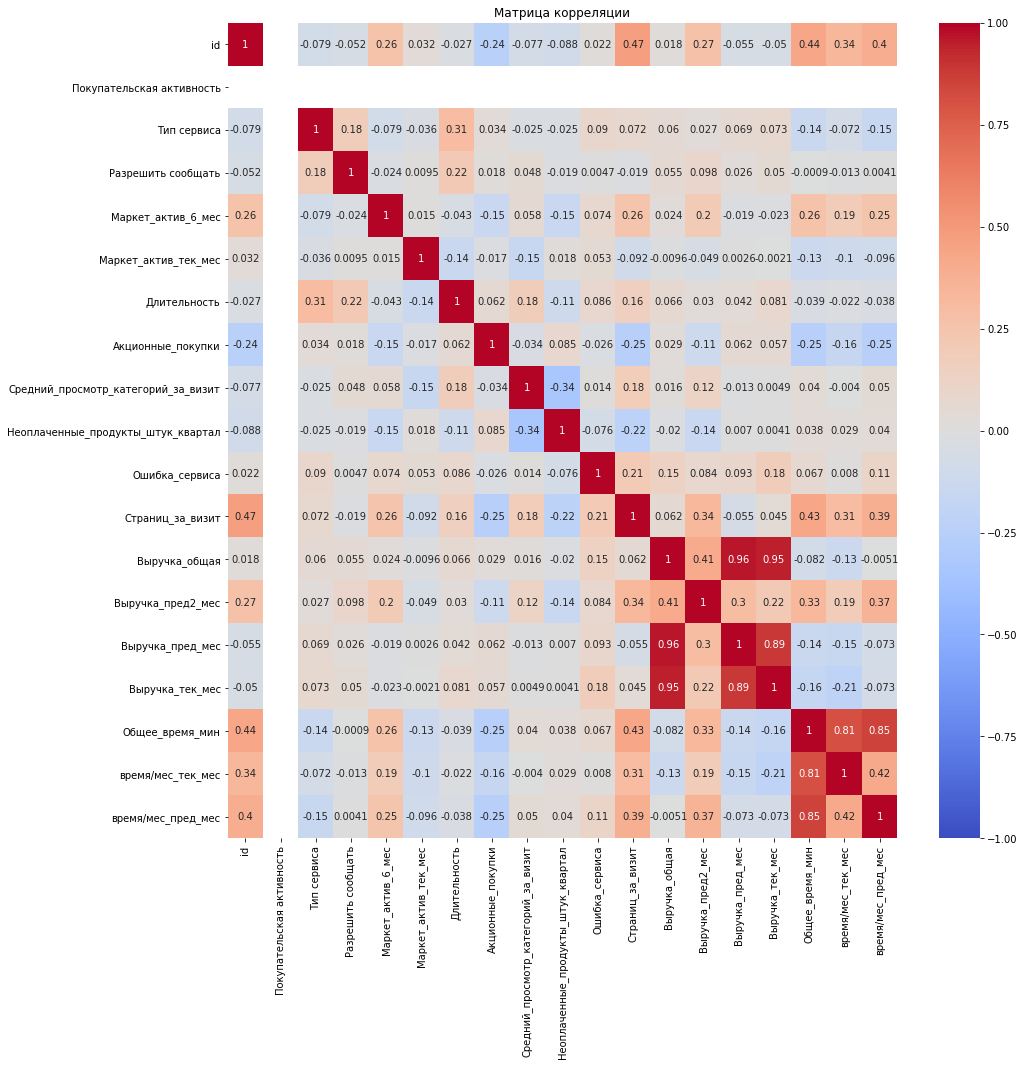

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_общая,Выручка_пред2_мес,Выручка_пред_мес,Выручка_тек_мес,Общее_время_мин,время/мес_тек_мес,время/мес_пред_мес
id,1.000000,NaN,-0.078505,-0.052219,0.264849,0.032153,-0.026602,-0.244763,-0.076802,-0.088427,0.021696,0.473385,0.018038,0.272918,-0.054655,-0.049912,0.436428,0.335963,0.397779
Покупательская активность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип сервиса,-0.078505,NaN,1.000000,0.178318,-0.079351,-0.035927,0.310753,0.034352,-0.025423,-0.025389,0.089717,0.071624,0.060186,0.027484,0.068740,0.072790,-0.137776,-0.072365,-0.149534
Разрешить сообщать,-0.052219,NaN,0.178318,1.000000,-0.024324,0.009518,0.216488,0.018316,0.048199,-0.019232,0.004679,-0.018612,0.054691,0.097789,0.025909,0.050040,-0.000899,-0.012715,0.004106
Маркет_актив_6_мес,0.264849,NaN,-0.079351,-0.024324,1.000000,0.014981,-0.043334,-0.145629,0.057687,-0.145378,0.073751,0.255415,0.024234,0.200480,-0.019394,-0.022953,0.258556,0.187945,0.245854
Маркет_актив_тек_мес,0.032153,NaN,-0.035927,0.009518,0.014981,1.000000,-0.139789,-0.017467,-0.153903,0.018350,0.052540,-0.091667,-0.009648,-0.048579,0.002634,-0.002107,-0.127191,-0.102348,-0.095558
Длительность,-0.026602,NaN,0.310753,0.216488,-0.043334,-0.139789,1.000000,0.062024,0.177366,-0.106405,0.085502,0.161769,0.065509,0.029785,0.042039,0.081287,-0.038821,-0.021847,-0.038016
Акционные_покупки,-0.244763,NaN,0.034352,0.018316,-0.145629,-0.017467,0.062024,1.000000,-0.033514,0.085077,-0.025621,-0.252080,0.029079,-0.110484,0.062265,0.056825,-0.251399,-0.163040,-0.252318
Средний_просмотр_категорий_за_визит,-0.076802,NaN,-0.025423,0.048199,0.057687,-0.153903,0.177366,-0.033514,1.000000,-0.337048,0.014460,0.183656,0.016393,0.124218,-0.013495,0.004918,0.040203,-0.003995,0.050168
Неоплаченные_продукты_штук_квартал,-0.088427,NaN,-0.025389,-0.019232,-0.145378,0.018350,-0.106405,0.085077,-0.337048,1.000000,-0.076094,-0.223826,-0.020200,-0.144722,0.006952,0.004144,0.038464,0.029473,0.040314


In [64]:
data1=data_corr[data_corr['Покупательская активность']== 0]

#data1=data_corr.query("Покупательская активность==0.")
corr_matrix = data1.corr(method='spearman')
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix.sort_values(by='Покупательская активность', ascending=False))

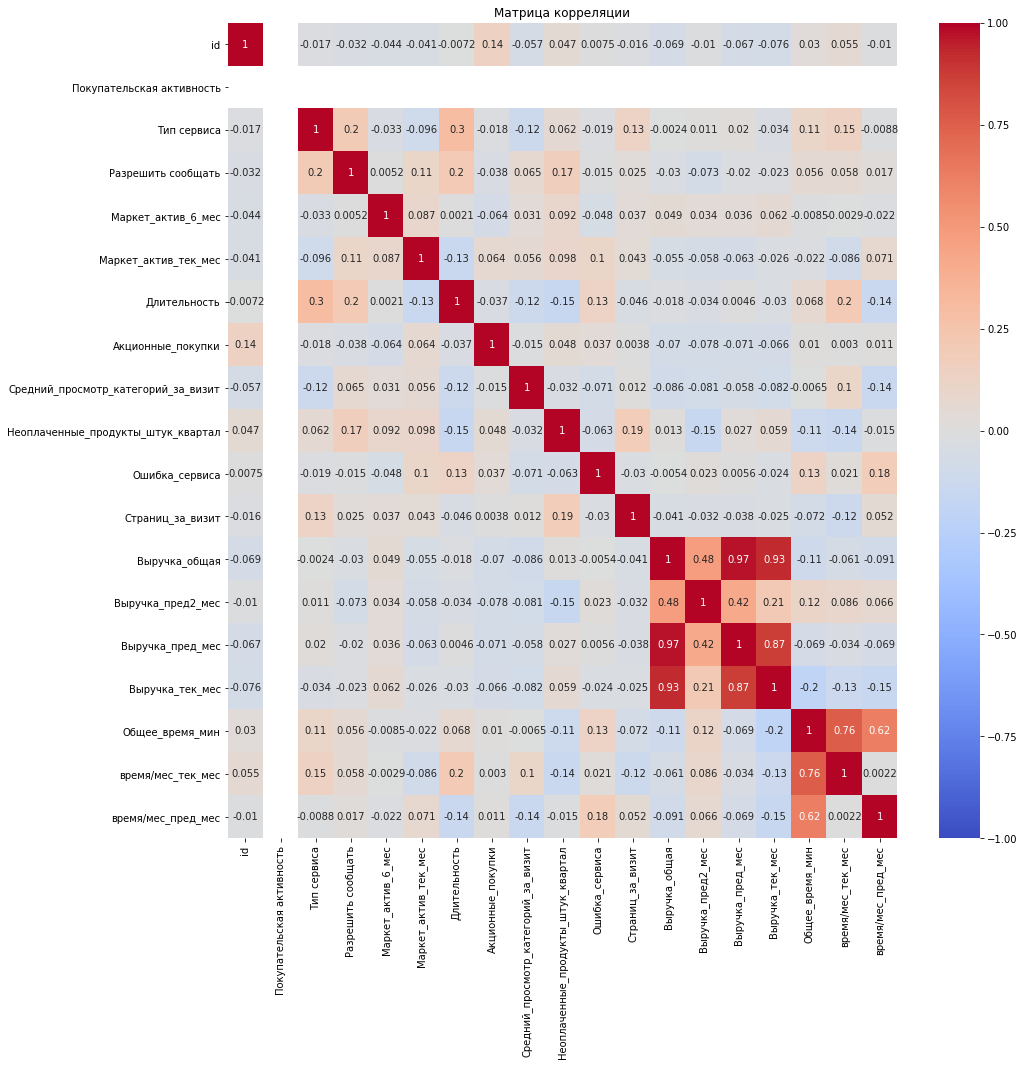

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_общая,Выручка_пред2_мес,Выручка_пред_мес,Выручка_тек_мес,Общее_время_мин,время/мес_тек_мес,время/мес_пред_мес
id,1.000000,NaN,-0.016950,-0.032481,-0.043648,-0.041192,-0.007208,0.137884,-0.057253,0.047460,0.007544,-0.016036,-0.069105,-0.010086,-0.067222,-0.076001,0.030389,0.055255,-0.009994
Покупательская активность,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Тип сервиса,-0.016950,NaN,1.000000,0.195725,-0.032867,-0.096311,0.297379,-0.017673,-0.121419,0.062465,-0.018876,0.130144,-0.002379,0.010977,0.019797,-0.033906,0.106712,0.145742,-0.008835
Разрешить сообщать,-0.032481,NaN,0.195725,1.000000,0.005248,0.108042,0.203356,-0.038337,0.064924,0.169055,-0.015377,0.025396,-0.030334,-0.072649,-0.019595,-0.023387,0.055800,0.057534,0.017219
Маркет_актив_6_мес,-0.043648,NaN,-0.032867,0.005248,1.000000,0.087219,0.002146,-0.064299,0.031268,0.092422,-0.048170,0.037201,0.049232,0.033868,0.036060,0.061910,-0.008490,-0.002891,-0.022224
Маркет_актив_тек_мес,-0.041192,NaN,-0.096311,0.108042,0.087219,1.000000,-0.134946,0.064391,0.056228,0.097528,0.101968,0.043397,-0.054686,-0.057905,-0.063402,-0.025879,-0.021870,-0.086009,0.070922
Длительность,-0.007208,NaN,0.297379,0.203356,0.002146,-0.134946,1.000000,-0.037051,-0.122522,-0.151348,0.127245,-0.046371,-0.018054,-0.033674,0.004634,-0.030319,0.068248,0.204762,-0.137284
Акционные_покупки,0.137884,NaN,-0.017673,-0.038337,-0.064299,0.064391,-0.037051,1.000000,-0.014665,0.047965,0.036545,0.003761,-0.070495,-0.077791,-0.070756,-0.066192,0.010418,0.003034,0.010626
Средний_просмотр_категорий_за_визит,-0.057253,NaN,-0.121419,0.064924,0.031268,0.056228,-0.122522,-0.014665,1.000000,-0.031982,-0.071336,0.011724,-0.086376,-0.081142,-0.057767,-0.081571,-0.006529,0.104820,-0.136346
Неоплаченные_продукты_штук_квартал,0.047460,NaN,0.062465,0.169055,0.092422,0.097528,-0.151348,0.047965,-0.031982,1.000000,-0.062817,0.187082,0.012648,-0.150872,0.027172,0.058716,-0.112365,-0.140198,-0.014934


In [65]:
data1=data_corr[data_corr['Покупательская активность']== 1]
#data1=data.query("Покупательская активность=='Прежний уровень'")
corr_matrix = data1.corr(method='spearman')
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            )
plt.title('Матрица корреляции')
plt.show()
display(corr_matrix.sort_values(by='Покупательская активность', ascending=False))

## Использование пайплайнов

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   int64  
 2   Тип сервиса                          1300 non-null   float64
 3   Разрешить сообщать                   1300 non-null   float64
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [67]:
ohe_columns = ['Тип сервиса']
ord_columns = ['Маркет_актив_тек_мес','Популярная_категория']
num_columns = ['Ошибка_сервиса',
               'Общее_время_мин',
               'время/мес_пред_мес',
               'Маркет_актив_6_мес',
               'Страниц_за_визит',
               'время/мес_тек_мес',
               'Средний_просмотр_категорий_за_визит',
               'Выручка_пред2_мес']

In [68]:
data1=data
RANDOM_STATE = 42
TEST_SIZE = 0.25


X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(['Покупательская активность','id'], axis=1),
    data1['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data1['Покупательская активность'])

### Создание пайплайна

In [69]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
        )
    ]
)

In [70]:
print(ohe_pipe)

Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse=False))])


In [71]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['5', '4', '3'],
                    ['Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Косметика и аксесуары','Домашний текстиль','Товары для детей']
                    
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [72]:
print(ord_pipe)

Pipeline(steps=[('simpleImputer_before_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['5', '4', '3'],
                                            ['Кухонная посуда',
                                             'Мелкая бытовая техника и '
                                             'электроника',
                                             'Техника для красоты и здоровья',
                                             'Косметика и аксесуары',
                                             'Домашний текстиль',
                                             'Товары для детей']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])


In [73]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

In [74]:
print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Тип сервиса']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(cate...
                                                         

In [75]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=42))
    ]
)

In [76]:
pipe_final.fit(X_train, y_train) 
y_test_pred = pipe_final.predict(X_test)
print(f'Метрика ROC-AUC pipe_final: {round(roc_auc_score(y_test,y_test_pred),2)}')

Метрика ROC-AUC pipe_final: 0.83


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.


### Проверка метрики GridSearchCV

In [77]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(1, 10),
        'models__max_features': range(1, 10),
        #'min_samples_split': range(1, 9),
        #'min_samples_leaf': range(1, 9),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=42, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [1,0.1,0.01,0.001],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]



In [78]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    #random_state=RANDOM_STATE, 
    n_jobs=-1
)
grid.fit(X_train, y_train) 



`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['Тип '
                                                                          'сервиса']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('simpleImputer_before_ord',
                                                                                          Simpl...
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(random_state=42)],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LogisticRegression(penalty='l1',
                                                        random_state=42,
                                                        solver='liblinear')],
                          'models__C': [1, 0.1, 0.01, 0.001],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='accuracy')

In [79]:
y_test_pred2 = grid.predict(X_test)

Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.


In [80]:
print(f'Метрика ROC-AUC GridSearchCV: {roc_auc_score(y_test, y_test_pred2)}')

Метрика ROC-AUC GridSearchCV: 0.848


In [81]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Тип сервиса']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                           

DecisionTreeClassifier(max_depth=8, max_features=9,
                                        random_state=42

### Проверка метрики RandomizedSearchCV

In [82]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_grid, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train) 

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse=False))]),
                                                                               ['Тип '
                                                                                'сервиса']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                Simp...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': [1, 0.1, 0.01, 0.001],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [83]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred3 = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC RandomizedSearchCV: {roc_auc_score(y_test, y_test_pred3)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Тип сервиса']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                           

Skipping features without any observed values: [0]. At least one non-missing value is needed for imputation with strategy='most_frequent'.


DecisionTreeClassifier(max_depth=2, max_features=6,
                                        random_state=42))]

### Результаты и сравнение метрик

In [84]:
print(f'Метрика ROC-AUC pipe_final: {round(roc_auc_score(y_test,y_test_pred),2)}')
acc = accuracy_score(y_test, y_test_pred)
display(acc)

Метрика ROC-AUC pipe_final: 0.83


0.8553846153846154

Обоснование:   
основной метрикой для оценки была выбрана ROC-AUC, так как она подходит для анализа бинарной классификации с несбалансированной выборкой.   

In [85]:
print(f'Метрика ROC-AUC GridSearchCV: {roc_auc_score(y_test, y_test_pred2)}')
acc2 = accuracy_score(y_test, y_test_pred2)
display(acc2)

Метрика ROC-AUC GridSearchCV: 0.848


0.8646153846153846

In [86]:
print(f'Метрика ROC-AUC RandomizedSearchCV: {roc_auc_score(y_test, y_test_pred3)}')
acc3 = accuracy_score(y_test, y_test_pred3)
display(acc3)

Метрика ROC-AUC RandomizedSearchCV: 0.846


0.8769230769230769

## Анализ признаков

In [87]:

preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        #('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough') 

X_train1=X_train.drop(ord_columns, axis=1)
X_test1=X_test.drop(ord_columns, axis=1)

In [88]:
X_train_transformed= preprocessor.fit_transform(X_train1)
X_test_transformed= preprocessor.transform(X_test1)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [89]:
modelka=DecisionTreeClassifier(max_depth=8, max_features=9, random_state=42)
modelka.fit(X_train1,y_train)

DecisionTreeClassifier(max_depth=8, max_features=9, random_state=42)

In [90]:
explainer = shap.TreeExplainer(modelka)
X_test_transformed=pd.DataFrame(X_test_transformed, columns = X_test1.columns)

In [91]:
shap_values = explainer(X_test_transformed)


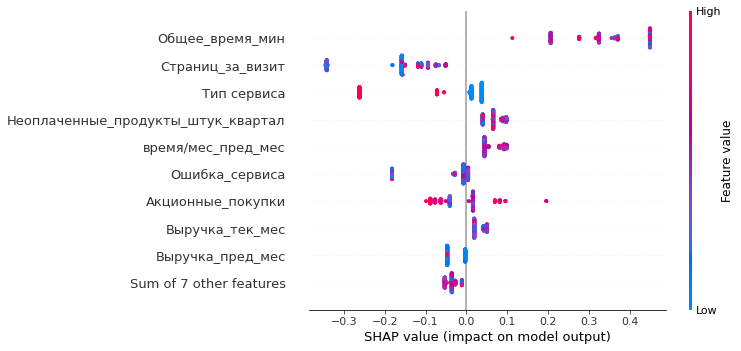

In [92]:
beeswarm(shap_values[:,:,1])

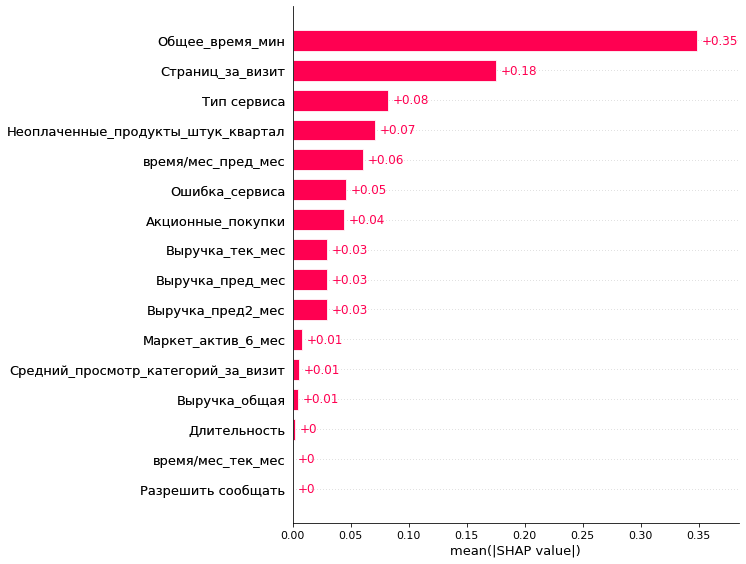

In [93]:

shap.plots.bar(shap_values[:,:,1], max_display=16) 

Чем больше на втором графике- тем лучше
1. Общее время
2. Страниц за визит
3. Тип сервиса
4. Кол-во неоплаченных продуктов
5. Наличие ошибок
6. Акционные покупки
7. Категории покупки


## Сегментация покупателей

Мы выделили важные для анализа показатели.


Нужно собрать данные по клиентам по следующим группам:  

Признаки, которые описывают коммуникацию сотрудников компании с клиентом.  

Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.  

Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.  

Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.  

### Выбор рабочей группы для анализа

In [94]:
money.max()

id         216647.00
Прибыль         7.43
dtype: float64

In [95]:
money['Прибыль'].describe()

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64


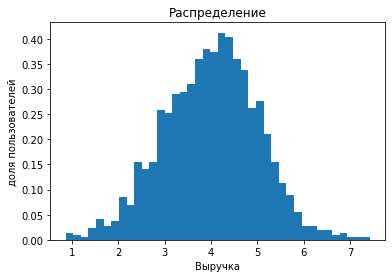

In [96]:
analysis_HIST(money,
             'Прибыль',
             'Распределение',
             'Выручка',
             'доля пользователей',
             40)

In [98]:
#Рабочая группа 
money_data_Work =money.query(" 2.9 <= Прибыль <= 5.2  ")
display(money_data_Work.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 1 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       978 non-null    int64  
 1   Прибыль  978 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


None

Наиболее крупная группа пользователей имеет среднюю прибыль (от 3 до 5 процентов примерно)  
Ее покупательскую активность стоит повысить, сравнив ее показателями с группой пользователей, обладающих большей прибылью.

### Разделение датасета по целевому признаку для сравнения показателей

In [99]:
data_Work = data.join(money_data_Work['Прибыль'] ) 
data_Work= data_Work.dropna(subset=['Прибыль'])
data_Work=data_Work[['Покупательская активность',
                     'Тип сервиса','Ошибка_сервиса',
                     'Выручка_пред_мес','Акционные_покупки',
                     'Общее_время_мин','Популярная_категория',
                     'Неоплаченные_продукты_штук_квартал']]
data_Work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 1 to 1299
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Покупательская активность           978 non-null    int64  
 1   Тип сервиса                         978 non-null    float64
 2   Ошибка_сервиса                      978 non-null    int64  
 3   Выручка_пред_мес                    978 non-null    float64
 4   Акционные_покупки                   978 non-null    float64
 5   Общее_время_мин                     978 non-null    int64  
 6   Популярная_категория                978 non-null    object 
 7   Неоплаченные_продукты_штук_квартал  978 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 68.8+ KB


In [100]:
data_Work['Покупательская активность'] =data_Work['Покупательская активность'].astype('int64')
data_Work['Покупательская активность'].unique()

array([0, 1])

In [101]:

data_Super=data_Work[data_Work['Покупательская активность']== 0]
data_Norm=data_Work[data_Work['Покупательская активность']== 1]


In [102]:
def analysis_HIST1(adata_in,adata_in2, chapter, heading, Х, Y, bins):
    #print(adata_in[chapter].describe())
    #adata_ini = adata_in.groupby(chapter).mean()
    #display(adata_in[chapter].head(5))
    figure, axis = plt.subplots()
    colors=['red','blue']
    labels=['Super','Norm']
    plt.title(heading)
    plt.xlabel(Х)
    plt.ylabel(Y)
    #plt.figure(figsize=(40,20))
    plt.hist(x=[adata_in[chapter],adata_in2[chapter]], color = colors, bins=bins, density=True, label=labels)
    #plt.hist(x=adata_in2[chapter], color = 'red', bins=bins, density=True,label='Norm')

In [103]:
def d1(adata_in,adata_in2, chapter):
    print('Доля показателя в 1 таблице',adata_in.groupby(chapter)[chapter].count()/len(adata_in[chapter]))
    print('Доля показателя во 2 таблице',adata_in2.groupby(chapter)[chapter].count()/len(adata_in2[chapter]))
    

In [104]:
def analysis_BAR1(adata_in,adata_in2, chapter, heading, Х, Y, bins):
    #print(adata_in[chapter].describe())
    #figure, axis = plt.subplots()
    adata_ini = adata_in[chapter].value_counts(ascending=True)
    adata_ini2 = adata_in2[chapter].value_counts(ascending=True)
    #display(adata_ini)
    figure, axis = plt.subplots( )
    adata_ini2.plot.bar(figsize=(5, 3), ec='black',color= 'blue', legend=True)
    adata_ini.plot.bar(figsize=(5, 3), ec='red',color= 'red',legend=True)
    plt.title(heading)
    #plt.xlabel(Х)
    #plt.ylabel(Y)
    plt.figure(figsize=(40,20))
    plt.show()

Можно заметить что пользовательская активность у пользователей с большей выручкой больше, но не сильно ( в районе 10%).    

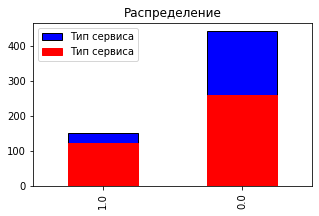

<Figure size 2880x1440 with 0 Axes>

Доля показателя в 1 таблице Тип сервиса
0.0    0.678851
1.0    0.321149
Name: Тип сервиса, dtype: float64
Доля показателя во 2 таблице Тип сервиса
0.0    0.746218
1.0    0.253782
Name: Тип сервиса, dtype: float64


In [106]:
analysis_BAR1(data_Super,
               data_Norm,
             'Тип сервиса',
             'Распределение',
             'Тип сервиса',
             'кол-во',
             10)
d1(data_Super,data_Norm, 'Тип сервиса')

Вывод:  
Среди сохранивших активность доля тех кто пользуется премиумом больше.

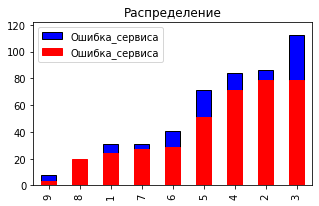

<Figure size 2880x1440 with 0 Axes>

Доля показателя в 1 таблице Ошибка_сервиса
1    0.062663
2    0.206266
3    0.206266
4    0.185379
5    0.133159
6    0.075718
7    0.070496
8    0.052219
9    0.007833
Name: Ошибка_сервиса, dtype: float64
Доля показателя во 2 таблице Ошибка_сервиса
0    0.025210
1    0.052101
2    0.119328
3    0.141176
4    0.188235
5    0.194958
6    0.144538
7    0.068908
8    0.052101
9    0.013445
Name: Ошибка_сервиса, dtype: float64


In [107]:
analysis_BAR1(data_Super,
               data_Norm,
             'Ошибка_сервиса',
             'Распределение',
             'Тип сервиса',
             'кол-во',
             10)
d1(data_Super,data_Norm, 'Ошибка_сервиса')

Вывод:  
Среди сохранивших активность в среднем количество оишбок меньше чем у тех кто ее теряет.

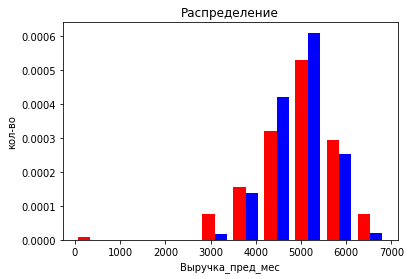

In [108]:
analysis_HIST1(data_Super,
               data_Norm,
             'Выручка_пред_мес',
             'Распределение',
             'Выручка_пред_мес',
             'кол-во',
             10)
#d1(data_Super,data_Norm, 'Выручка_пред_мес')

Вывод:  
От сохранивших активность выручка в предыдущий месяц меньше чем у тех кто покинул сервис. (Возможно это стало причиной, так как чем больше выгода компании тем менее выгодно клинету)

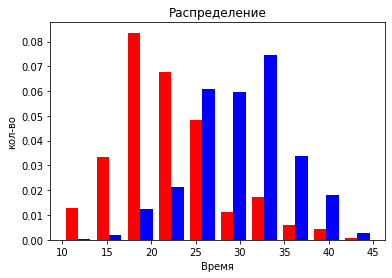

In [109]:
analysis_HIST1(data_Super,
               data_Norm,
             'Общее_время_мин',
             'Распределение',
             'Время',
             'кол-во',
             10)
#d1(data_Super,data_Norm, 'Общее_время_мин')

Вывод:  
Среди сохранивших активность проводимое на сайте время сильно меньше

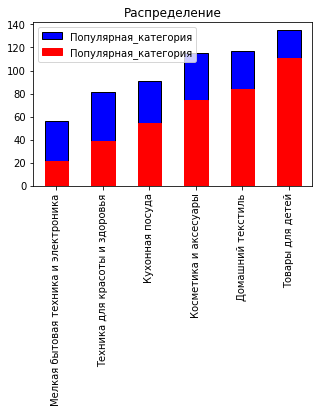

<Figure size 2880x1440 with 0 Axes>

In [110]:
analysis_BAR1(data_Super,
               data_Norm,
             'Популярная_категория',
             'Распределение',
             'Популярная_категория',
             'кол-во',
             10)
#d1(data_Super,data_Norm, 'Популярная_категория')

Вывод:  
Среди сохранивших активность распрелеление категорий почти не отличается от тех кто стал менее активным  

## Общий вывод

<b>Вывод по предобработке:  </b> 

Проверил размерность  
Проверил типы данных  
Ввел доп. показатели  
Подготовил данные для анализа данных 
Данные не обладали резкими выбросами или значительными искажениями.

<b>Вывод по исследовательсткому анализу:  </b>   

Целевой признак распределен неравномерно, большая часть пользователей сохранила свой уровень активности  
Количество клиентов со стандартной подпиской почти в 2.5 раза больше чем премьер.  
Большая часть клиентов оставляет оповещения от приложения, возможно это связано с их малой частотой либо сложностями в отключении.  
Основная масса пользователей приносит выгоду в размере от 3 до 6 процентов, однако присутствует некоторое количество тех, кто покупает более выгодные для маркетплейсов товары.  
Наибольшее количество клиентов приносит 4%.   
Почти половина клиентов имеет среднее значение взаимодействий с марктеплейсом (4), а количество тех кто обращается меньше и больше раз равно.  
Можно заметить что количество привлекаемых пользователей плавно падает по мере существования магазина, возможно это связано с уменьшением количества не пользующихся им людей.  

Клиенты делятся на 2 группы  
Первая покупает только во время акций, из за чего показатель стремится к 1  
Вторая производит покупки постоянно, не подстраивая график под акции  
Наибольшую популрность имею товары детей  
Меньше всего покупают Кухонную посуду  
В среднем клиент просматривает от 2 до 5 категорий за визит.   
Большая часть клиентов имеет малое количество неоплаченных покупок.     
В среднем клиент получает от 2 до 6 ошибок в месяц  

Средняий показатель проведенного времени у пользоватей 20-35 минут. Скорее всего этого времени хватает на просмотр свежих предложений либо поиск нужного товара и его сравнения с аналогами.

В среднем общая выручка от клиента за 3 месяца находится в промежутке от 12500 до 17500.
Присутвуют значения как сильно меньше, так и больше, но они скорее всего связаны с заинтересованностью отдельных клиентов в маркетплейсе.

Средний показатель выручки у пользоватей 3-5.5 процентов.
Видимо этот показатель наиболее характерен для представленных товаров, с учетом периодических акций, сокращающих этот процесс в случае отдельной покупки

<b>Объединение таблиц:</b>  
Получен основной датасет, в него включены данные о выручке, прибыли и проведенном времени.  
Полученный набор данных подготовленк дальнейшему анализу

<b>Корреляционный анализ:</b> 
Наибольшее влияние на покупательскую активность оказывают такие показатели как:

Время проведенное на сайте (как бщее так и в отдельные месяцы)
Страниц_за_визит
Маркет_актив6мес (активность за послдние месяцы)
Средний_просмотр_категорий_за_визит
Выручка_пред2_мес (выручка за препредыдущий месяц) (возможно это связано с тем что при выгодной деятельности работа на сайте продолжается, а при ошибке пользователь уходит, либо с каким либо мероприятием, проходившим за месяц до момента сбора данных)

С учетом этих данных в дальнейшем будет строиться формирвоание и обучение моделей в пайплайнах, а также дальнешйая сегментация по резльтатам.

<b>Пайплайны:</b>  

Проведено формирвоание и обучение пайплайнов.  
отобрана наиболее подходящая нам метрика для оценки и финальная модель на основе сравнения результатов исследований.  
<b>(DecisionTreeClassifier(max_depth=8, max_features=9, random_state=42)</b>  

Проведены проверки качества модели

<b> Анализ признаков:</b>  
На основе лучшей модели проводим анализ и визуализацию показателей.
Отобран второй список наиболее важных для целевого признака показателей: 
Общее время  
Страниц за визит
Тип сервиса
Кол-во неоплаченных продуктов
Наличие ошибок
Акционные покупки
Категории покупки

Полученный данные используем в дальнейшем для дальнейшей сегментации

<b>Сегментация покупателей:</b> 

Мы выделяем целевую группу пользователей 
Наиболее крупная группа пользователей имеет среднюю прибыль (от 3 до 5 процентов примерно)
Ее покупательскую активность стоит повысить, сравнив ее показателями с группой пользователей, обладающих большей прибылью.

Производим ее разделение по целевому признаку, сравниваем показатели влияющих на него показателей и делаем выводы о том на что нужно обратить внимание для улучшения эффективности работы.

<b>Финал</b> 

Согласно результатам исследования для улучшения удержания клиентов следует обратить внимание на следующие вещи:
1. Увеличение количества их прибыли( А следовательно либо изменение ценовой политики, либо увелечения количества акций)
2. Улучшение качества работы сервиса (Ошибки сильно влияют на удржание аудитории)
3. Увеличением количества премиум-пользователй
4. Возможно стоит обратить внимание подачу информации о товаре или интерфейс, ведь постоянные пользователи проводят на сайте значительно меньше времени чем те кто уходят с площадки.